# Attempt on prediciting Missing Datavalues using KNN
metric scores were low

In [2]:
# importing relevant modules
import math
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from openpyxl import load_workbook


import random
from random import shuffle
from sklearn import metrics 
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time


In [39]:
filepath="credit_card_data.xlsx" #Enter full filepath here
wb=load_workbook(filepath)
sheet=wb.active

#set-wise data read-in 
def read(num):
    x, y = [], []
    
# 1. Male, 2. Age, 3. Debt, 4. Married, 5. Bank Customer, 6. Education Level, 7. Ethnicity, 8. Years Employed, 
# 9.Prior Default, 10. Employed, 11. Credit Score, 12. Driver's License, 13. Citizen, 14. Zip Code, 15. Income
# 16. Approved

# Attribtes with Missing Datas:
# 1,2,4,5,6,7,14
    cols = [3, 8, 9, 10, 11, 12, 13, 15, 16]  # 8 elements representing the attributes with complete data values
    for i in cols:
        x.append(sheet.cell(row=num+1,column=i).value)
    #y.append(sheet.cell(row=num+1,column=1).value)
    #return x, y
    
    #a = [1,2,4,5,6,7,14]
    a = [7]
    for z in a:
        y.append(sheet.cell(row=num+1,column=z).value)
    return x, y

x_data, y_data = [], []
for j in range(1, 654):
    valx, valy = read(j)
    x_data.append(valx)    
    y_data.append(valy)

print(x_data, y_data)

[[0, 1.25, 1, 1, 1, 0, 0, 0, 1], [4.46, 3.04, 1, 1, 6, 0, 0, 560, 1], [0.5, 1.5, 1, 0, 0, 0, 0, 824, 1], [1.54, 3.75, 1, 1, 5, 1, 0, 3, 1], [5.625, 1.71, 1, 0, 0, 0, 2, 0, 1], [4, 2.5, 1, 0, 0, 1, 0, 0, 1], [1.04, 6.5, 1, 0, 0, 1, 0, 31285, 1], [11.585, 0.04, 1, 0, 0, 0, 0, 1349, 1], [0.5, 3.96, 1, 0, 0, 0, 0, 314, 1], [4.915, 3.165, 1, 0, 0, 1, 0, 1442, 1], [0.83, 2.165, 0, 0, 0, 1, 0, 0, 1], [1.835, 4.335, 1, 0, 0, 0, 0, 200, 1], [6, 1, 1, 0, 0, 1, 0, 0, 1], [6.04, 0.04, 0, 0, 0, 0, 0, 2690, 1], [10.5, 5, 1, 1, 7, 1, 0, 0, 1], [4.415, 0.25, 1, 1, 10, 1, 0, 0, 1], [0.875, 0.96, 1, 1, 3, 1, 0, 0, 1], [5.875, 3.17, 1, 1, 10, 0, 0, 245, 1], [0.25, 0.665, 1, 0, 0, 1, 0, 0, 1], [8.585, 0.75, 1, 1, 7, 0, 0, 0, 1], [11.25, 2.5, 1, 1, 17, 0, 0, 1208, 1], [1, 0.835, 1, 0, 0, 0, 2, 0, 1], [8, 7.875, 1, 1, 6, 1, 0, 1260, 1], [14.5, 3.085, 1, 1, 1, 0, 0, 11, 1], [6.5, 0.5, 1, 1, 3, 1, 0, 0, 1], [0.585, 1.5, 1, 1, 2, 0, 0, 0, 1], [13, 5.165, 1, 1, 9, 1, 0, 0, 1], [18.5, 15, 1, 1, 17, 1, 0, 0, 1], 

In [40]:
random.seed(455534) # random number generator, a specific random number will be used in every iteration of the code
toshuffle = list(zip(x_data, y_data)) #zip x and y (keeps x and y together)
shuffle(toshuffle) # shuffle
x_data, y_data = zip(*toshuffle) # open the shuffled data sets
#print(x_data[5])

In [41]:
# Process of shuffling the dataset in a coherent way
# ~ 15% test ; ~ 85% train
cut = 550
train_x, train_y = x_data[0:cut], y_data[0:cut] # train = 550 datasets
test_x, test_y = x_data[cut:650], y_data[cut:650] # test = 100 datasets

# Implementing KNN 
#kmodel = KNeighborsClassifier(n_neighbors=5)  
kmodel = KNeighborsClassifier(n_neighbors=25, weights='uniform', algorithm='auto', leaf_size=1, p=3 ,metric='minkowski', metric_params=None, n_jobs=None)
#kmodel = KNeighborsRegressor(n_neighbors=32, weights='uniform', algorithm='auto', leaf_size=1, p=1 ,metric='minkowski', metric_params=None, n_jobs=None)
#kmodel = KNeighborsRegressor(n_neighbors=32, p=2)
# leaf size will only affect the speed, not the result
# n = 5,7,8 yields 78%

#kmodel.fit(x_data_train, y_data_train)
kmodel.fit(train_x, train_y)


# To check our model performance, we will check the confusion matrix ie, True +ve,-ve and False +ve,-ve

from sklearn.metrics import confusion_matrix

#predicted = kmodel.predict_proba(x_data_test)
predicted = kmodel.predict_proba(test_x)
#print(predicted)
c = 0
for each in range(len(predicted)):
    #if np.any(predicted[each]) == test_y[each]:
    if np.argmax(predicted[each]) == (test_y[each]):    
        c += 1


print("Percentage Accuracy: ", float(c/len(predicted))*100)

#print(confusion_matrix(y_data_test,predicted))



Percentage Accuracy:  57.99999999999999


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [6]:
y_pred = kmodel.predict(test_x)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:

c = 0
for each in range(len(y_pred)):
#if np.argmax(predicted[each]) == y_data_test[each]:
    print(y_pred[0],test_y[0])
    if y_pred[each] == test_y[each]:    
        c += 1


print("Percentage Accuracy: ", float(c/len(y_pred))*100)
y = b.append(float(c/len(y_pred))*100)


In [ ]:
#pred_y = kmodel.predict(test_x)
#print("Accuracy:",metrics.accuracy_score(test_y, np.around(pred_y)*100))
#print(metrics.explained_variance_score(test_y, y_pred))
print(metrics.r2_score(test_y, y_pred))



# Elbow Plot

In [34]:
cut = 550
train_x, train_y = x_data[0:cut], y_data[0:cut] # train = 550 datasets
test_x, test_y = x_data[cut:650], y_data[cut:650] # test = 100 datasets

# creating 2 empty array
a =[]
b=[]

# Implementing KNN 
#kmodel = KNeighborsClassifier(n_neighbors=5)
for i in range(1,500):
    kmodel = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', leaf_size=1, p=3 ,metric='minkowski', metric_params=None, n_jobs=None)
# leaf size will only affect the speed, not the result
# n = 5,7,8 yields 78%
    print('n_neighbors: ', i) #-----> n =32 is gives the earliest highest percentage accuracy
    #print('p: ', i) #---------> p = 1 gives the highest percentage accuracy 
    x = a.append(i)
#kmodel.fit(x_data_train, y_data_train)
    kmodel.fit(train_x, train_y)

    #y_pred = kmodel.predict(test_x)
    #print(metrics.r2_score(test_y, y_pred))

    from sklearn.metrics import confusion_matrix

    #predicted = kmodel.predict_proba(x_data_test)
    predicted = kmodel.predict(test_x)
    #print(predicted)
    c = 0
    for each in range(len(predicted)):
    #if np.any(predicted[each]) == test_y[each]:
        if predicted[each] == (test_y[each]):    
            c += 1


    print("Percentage Accuracy: ", float(c/len(predicted))*100)

#print(confusion_matrix(y_data_test,predicted))
    y = b.append(float(c/len(predicted))*100)
#print(confusion_matrix(y_data_test,predicted))


n_neighbors:  1
Percentage Accuracy:  52.0
n_neighbors:  2
Percentage Accuracy:  47.0
n_neighbors:  3
Percentage Accuracy:  56.99999999999999
n_neighbors:  4
Percentage Accuracy:  53.0
n_neighbors:  5
Percentage Accuracy:  56.99999999999999
n_neighbors:  6
Percentage Accuracy:  54.0
n_neighbors:  7
Percentage Accuracy:  60.0
n_neighbors:  8
Percentage Accuracy:  59.0
n_neighbors:  9
Percentage Accuracy:  64.0
n_neighbors:  10
Percentage Accuracy:  62.0
n_neighbors:  11
Percentage Accuracy:  65.0
n_neighbors:  12
Percentage Accuracy:  65.0
n_neighbors:  13
Percentage Accuracy:  65.0
n_neighbors:  14
Percentage Accuracy:  65.0
n_neighbors:  15


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  63.0
n_neighbors:  16
Percentage Accuracy:  62.0
n_neighbors:  17
Percentage Accuracy:  64.0
n_neighbors:  18
Percentage Accuracy:  63.0
n_neighbors:  19
Percentage Accuracy:  64.0
n_neighbors:  20
Percentage Accuracy:  64.0
n_neighbors:  21
Percentage Accuracy:  65.0
n_neighbors:  22
Percentage Accuracy:  63.0
n_neighbors:  23
Percentage Accuracy:  67.0
n_neighbors:  24
Percentage Accuracy:  64.0
n_neighbors:  25
Percentage Accuracy:  66.0
n_neighbors:  26
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 64.0
n_neighbors:  27
Percentage Accuracy:  66.0
n_neighbors:  28
Percentage Accuracy:  66.0
n_neighbors:  29
Percentage Accuracy:  66.0
n_neighbors:  30
Percentage Accuracy:  66.0
n_neighbors:  31
Percentage Accuracy:  66.0
n_neighbors:  32
Percentage Accuracy:  66.0
n_neighbors:  33
Percentage Accuracy:  67.0
n_neighbors:  34
Percentage Accuracy:  67.0
n_neighbors:  35
Percentage Accuracy:  67.0
n_neighbors:  36
Percentage Accuracy:  67.0
n_neighbors:  37
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  38
Percentage Accuracy:  66.0
n_neighbors:  39
Percentage Accuracy:  66.0
n_neighbors:  40
Percentage Accuracy:  66.0
n_neighbors:  41
Percentage Accuracy:  66.0
n_neighbors:  42
Percentage Accuracy:  66.0
n_neighbors:  43
Percentage Accuracy:  66.0
n_neighbors:  44
Percentage Accuracy:  66.0
n_neighbors:  45
Percentage Accuracy:  66.0
n_neighbors:  46
Percentage Accuracy:  66.0
n_neighbors:  47
Percentage Accuracy:  

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

66.0
n_neighbors:  48
Percentage Accuracy:  66.0
n_neighbors:  49
Percentage Accuracy:  66.0
n_neighbors:  50
Percentage Accuracy:  66.0
n_neighbors:  51
Percentage Accuracy:  66.0
n_neighbors:  52
Percentage Accuracy:  66.0
n_neighbors:  53
Percentage Accuracy:  66.0
n_neighbors:  54
Percentage Accuracy:  66.0
n_neighbors:  55
Percentage Accuracy:  66.0
n_neighbors:  56
Percentage Accuracy:  66.0
n_neighbors:  57
Percentage Accuracy:  66.0
n_neighbors:  58


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  59
Percentage Accuracy:  66.0
n_neighbors:  60
Percentage Accuracy:  66.0
n_neighbors:  61
Percentage Accuracy:  66.0
n_neighbors:  62
Percentage Accuracy:  66.0
n_neighbors:  63
Percentage Accuracy:  66.0
n_neighbors:  64
Percentage Accuracy:  66.0
n_neighbors:  65
Percentage Accuracy:  66.0
n_neighbors:  66
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  67
Percentage Accuracy:  66.0
n_neighbors:  68
Percentage Accuracy:  66.0
n_neighbors:  69
Percentage Accuracy:  66.0
n_neighbors:  70
Percentage Accuracy:  66.0
n_neighbors:  71
Percentage Accuracy:  66.0
n_neighbors:  72
Percentage Accuracy:  66.0
n_neighbors:  73
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  74
Percentage Accuracy:  66.0
n_neighbors:  75
Percentage Accuracy:  66.0
n_neighbors:  76
Percentage Accuracy:  66.0
n_neighbors:  77
Percentage Accuracy:  66.0
n_neighbors:  78
Percentage Accuracy:  66.0
n_neighbors:  79
Percentage Accuracy:  66.0
n_neighbors:  80
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  81
Percentage Accuracy:  66.0
n_neighbors:  82
Percentage Accuracy:  66.0
n_neighbors:  83
Percentage Accuracy:  66.0
n_neighbors:  84
Percentage Accuracy:  66.0
n_neighbors:  85
Percentage Accuracy:  66.0
n_neighbors:  86
Percentage Accuracy:  66.0
n_neighbors:  87
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  88
Percentage Accuracy:  66.0
n_neighbors:  89
Percentage Accuracy:  66.0
n_neighbors:  90
Percentage Accuracy:  66.0
n_neighbors:  91
Percentage Accuracy:  66.0
n_neighbors:  92
Percentage Accuracy:  66.0
n_neighbors:  93
Percentage Accuracy:  66.0
n_neighbors:  94
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  95
Percentage Accuracy:  66.0
n_neighbors:  96
Percentage Accuracy:  66.0
n_neighbors:  97
Percentage Accuracy:  66.0
n_neighbors:  98
Percentage Accuracy:  66.0
n_neighbors:  99
Percentage Accuracy:  66.0
n_neighbors:  100


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  101
Percentage Accuracy:  66.0
n_neighbors:  102
Percentage Accuracy:  66.0
n_neighbors:  103
Percentage Accuracy:  66.0
n_neighbors:  104
Percentage Accuracy:  66.0
n_neighbors:  105
Percentage Accuracy:  66.0
n_neighbors:  106
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  107
Percentage Accuracy:  66.0
n_neighbors:  108
Percentage Accuracy:  66.0
n_neighbors:  109
Percentage Accuracy:  66.0
n_neighbors:  110
Percentage Accuracy:  66.0
n_neighbors:  111
Percentage Accuracy:  66.0
n_neighbors:  112
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  113
Percentage Accuracy:  66.0
n_neighbors:  114
Percentage Accuracy:  66.0
n_neighbors:  115
Percentage Accuracy:  66.0
n_neighbors:  116
Percentage Accuracy:  66.0
n_neighbors:  117
Percentage Accuracy:  66.0
n_neighbors:  118
Percentage Accuracy:  66.0
n_neighbors:  119
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  120
Percentage Accuracy:  66.0
n_neighbors:  121
Percentage Accuracy:  66.0
n_neighbors:  122
Percentage Accuracy:  66.0
n_neighbors:  123
Percentage Accuracy:  66.0
n_neighbors:  124
Percentage Accuracy:  66.0
n_neighbors:  125
Percentage Accuracy:  66.0
n_neighbors: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 126
Percentage Accuracy:  66.0
n_neighbors:  127
Percentage Accuracy:  66.0
n_neighbors:  128
Percentage Accuracy:  66.0
n_neighbors:  129
Percentage Accuracy:  66.0
n_neighbors:  130
Percentage Accuracy:  66.0
n_neighbors:  131
Percentage Accuracy:  66.0
n_neighbors:  132


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  133
Percentage Accuracy:  66.0
n_neighbors:  134
Percentage Accuracy:  66.0
n_neighbors:  135
Percentage Accuracy:  66.0
n_neighbors:  136
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  137
Percentage Accuracy:  66.0
n_neighbors:  138
Percentage Accuracy:  66.0
n_neighbors:  139
Percentage Accuracy:  66.0
n_neighbors:  140
Percentage Accuracy:  66.0
n_neighbors:  141
Percentage Accuracy:  66.0
n_neighbors:  142


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  143
Percentage Accuracy:  66.0
n_neighbors:  144
Percentage Accuracy:  66.0
n_neighbors:  145
Percentage Accuracy:  66.0
n_neighbors:  146
Percentage Accuracy:  66.0
n_neighbors:  147
Percentage Accuracy:  66.0
n_neighbors:  148


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  149
Percentage Accuracy:  66.0
n_neighbors:  150
Percentage Accuracy:  66.0
n_neighbors:  151
Percentage Accuracy:  66.0
n_neighbors:  152
Percentage Accuracy:  66.0
n_neighbors:  153
Percentage Accuracy:  66.0
n_neighbors:  154
Percentage Accuracy:  66.0
n_neighbors:  155


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  156
Percentage Accuracy:  66.0
n_neighbors:  157
Percentage Accuracy:  66.0
n_neighbors:  158
Percentage Accuracy:  66.0
n_neighbors:  159
Percentage Accuracy:  66.0
n_neighbors:  160
Percentage Accuracy:  66.0
n_neighbors:  161
Percentage Accuracy:  66.0

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column


n_neighbors:  162
Percentage Accuracy:  66.0
n_neighbors:  163
Percentage Accuracy:  66.0
n_neighbors:  164
Percentage Accuracy:  66.0
n_neighbors:  165
Percentage Accuracy:  66.0
n_neighbors:  166
Percentage Accuracy:  66.0
n_neighbors:  167


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  168
Percentage Accuracy:  66.0
n_neighbors:  169
Percentage Accuracy:  66.0
n_neighbors:  170
Percentage Accuracy:  66.0
n_neighbors:  171
Percentage Accuracy:  66.0
n_neighbors:  172
Percentage Accuracy:  66.0
n_neighbors:  173


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  174
Percentage Accuracy:  66.0
n_neighbors:  175
Percentage Accuracy:  66.0
n_neighbors:  176
Percentage Accuracy:  66.0
n_neighbors:  177
Percentage Accuracy:  66.0
n_neighbors:  178
Percentage Accuracy:  66.0
n_neighbors:  179


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  180
Percentage Accuracy:  66.0
n_neighbors:  181
Percentage Accuracy:  66.0
n_neighbors:  182
Percentage Accuracy:  66.0
n_neighbors:  183
Percentage Accuracy:  66.0
n_neighbors:  184
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


 66.0
n_neighbors:  185
Percentage Accuracy:  66.0
n_neighbors:  186
Percentage Accuracy:  66.0
n_neighbors:  187
Percentage Accuracy:  66.0
n_neighbors:  188
Percentage Accuracy:  66.0
n_neighbors:  189


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  190
Percentage Accuracy:  66.0
n_neighbors:  191
Percentage Accuracy:  66.0
n_neighbors:  192
Percentage Accuracy:  66.0
n_neighbors:  193
Percentage Accuracy:  66.0
n_neighbors:  194
Percentage Accuracy:  

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

66.0
n_neighbors:  195
Percentage Accuracy:  66.0
n_neighbors:  196
Percentage Accuracy:  66.0
n_neighbors:  197
Percentage Accuracy:  66.0
n_neighbors:  198
Percentage Accuracy:  66.0
n_neighbors:  199
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  200
Percentage Accuracy:  66.0
n_neighbors:  201
Percentage Accuracy:  66.0
n_neighbors:  202
Percentage Accuracy:  66.0
n_neighbors:  203
Percentage Accuracy:  66.0
n_neighbors:  204
Percentage Accuracy:  66.0
n_neighbors:  205


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  206
Percentage Accuracy:  66.0
n_neighbors:  207
Percentage Accuracy:  66.0
n_neighbors:  208
Percentage Accuracy:  66.0
n_neighbors:  209
Percentage Accuracy:  66.0
n_neighbors:  210
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  211
Percentage Accuracy:  66.0
n_neighbors:  212
Percentage Accuracy:  66.0
n_neighbors:  213
Percentage Accuracy:  66.0
n_neighbors:  214
Percentage Accuracy:  66.0
n_neighbors:  215
Percentage Accuracy:  66.0
n_neighbors:  216


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  217
Percentage Accuracy:  66.0
n_neighbors:  218
Percentage Accuracy:  66.0
n_neighbors:  219
Percentage Accuracy:  66.0
n_neighbors:  220
Percentage Accuracy:  66.0
n_neighbors:  221


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  222
Percentage Accuracy:  66.0
n_neighbors:  223
Percentage Accuracy:  66.0
n_neighbors:  224
Percentage Accuracy:  66.0
n_neighbors:  225
Percentage Accuracy:  66.0
n_neighbors:  226
Percentage Accuracy:  66.0
n_neighbors:  227


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  228
Percentage Accuracy:  66.0
n_neighbors:  229
Percentage Accuracy:  66.0
n_neighbors:  230
Percentage Accuracy:  66.0
n_neighbors:  231
Percentage Accuracy:  66.0
n_neighbors:  232


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  233
Percentage Accuracy:  66.0
n_neighbors:  234
Percentage Accuracy:  66.0
n_neighbors:  235
Percentage Accuracy:  66.0
n_neighbors:  236
Percentage Accuracy:  66.0
n_neighbors:  237


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  238
Percentage Accuracy:  66.0
n_neighbors:  239
Percentage Accuracy:  66.0
n_neighbors:  240
Percentage Accuracy:  66.0
n_neighbors:  241
Percentage Accuracy:  66.0
n_neighbors:  242


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  243
Percentage Accuracy:  66.0
n_neighbors:  244
Percentage Accuracy:  66.0
n_neighbors:  245
Percentage Accuracy:  66.0
n_neighbors:  246
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  247
Percentage Accuracy:  66.0
n_neighbors:  248
Percentage Accuracy:  66.0
n_neighbors:  249
Percentage Accuracy:  66.0
n_neighbors:  250
Percentage Accuracy:  66.0
n_neighbors:  251


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Percentage Accuracy:  66.0
n_neighbors:  252
Percentage Accuracy:  66.0
n_neighbors:  253
Percentage Accuracy:  66.0
n_neighbors:  254
Percentage Accuracy:  66.0
n_neighbors:  255
Percentage Accuracy:  66.0
n_neighbors: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


 256
Percentage Accuracy:  66.0
n_neighbors:  257
Percentage Accuracy:  66.0
n_neighbors:  258
Percentage Accuracy:  66.0
n_neighbors:  259
Percentage Accuracy:  66.0
n_neighbors:  260


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  261
Percentage Accuracy:  66.0
n_neighbors:  262
Percentage Accuracy:  66.0
n_neighbors:  263
Percentage Accuracy:  66.0
n_neighbors:  264
Percentage Accuracy:  66.0
n_neighbors:  265


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  266
Percentage Accuracy:  66.0
n_neighbors:  267
Percentage Accuracy:  66.0
n_neighbors:  268
Percentage Accuracy:  66.0
n_neighbors:  269
Percentage Accuracy:  66.0
n_neighbors:  270


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  271
Percentage Accuracy:  66.0
n_neighbors:  272
Percentage Accuracy:  66.0
n_neighbors:  273
Percentage Accuracy:  66.0
n_neighbors:  274
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  275
Percentage Accuracy:  66.0
n_neighbors:  276
Percentage Accuracy:  66.0
n_neighbors:  277
Percentage Accuracy:  66.0
n_neighbors:  278
Percentage Accuracy:  66.0
n_neighbors:  279
Percentage Accuracy:  66.0
n_neighbors:  280
Percentage Accuracy:  66.0
n_neighbors:  281
Percentage Accuracy:  66.0
n_neighbors:  282


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  283
Percentage Accuracy:  66.0
n_neighbors:  284
Percentage Accuracy:  66.0
n_neighbors:  285
Percentage Accuracy:  66.0
n_neighbors:  286
Percentage Accuracy:  66.0
n_neighbors:  287
Percentage Accuracy:  66.0
n_neighbors:  288
Percentage Accuracy:  66.0
n_neighbors:  289
Percentage Accuracy:  66.0
n_neighbors:  290


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  291
Percentage Accuracy:  66.0
n_neighbors:  292
Percentage Accuracy:  66.0
n_neighbors:  293
Percentage Accuracy:  66.0
n_neighbors:  294
Percentage Accuracy:  66.0
n_neighbors:  295
Percentage Accuracy:  66.0
n_neighbors:  296
Percentage Accuracy:  66.0
n_neighbors:  297
Percentage Accuracy:  66.0
n_neighbors:  298


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  299
Percentage Accuracy:  66.0
n_neighbors:  300
Percentage Accuracy:  66.0
n_neighbors:  301
Percentage Accuracy:  66.0
n_neighbors:  302
Percentage Accuracy:  66.0
n_neighbors:  303
Percentage Accuracy:  66.0
n_neighbors:  304
Percentage Accuracy:  66.0
n_neighbors:  305
Percentage Accuracy:  

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

66.0
n_neighbors:  306
Percentage Accuracy:  66.0
n_neighbors:  307
Percentage Accuracy:  66.0
n_neighbors:  308
Percentage Accuracy:  66.0
n_neighbors:  309
Percentage Accuracy:  66.0
n_neighbors:  310
Percentage Accuracy:  66.0
n_neighbors:  311
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  312
Percentage Accuracy:  66.0
n_neighbors:  313
Percentage Accuracy:  66.0
n_neighbors:  314
Percentage Accuracy:  66.0
n_neighbors:  315
Percentage Accuracy:  66.0
n_neighbors:  316
Percentage Accuracy:  66.0
n_neighbors:  317


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  318
Percentage Accuracy:  66.0
n_neighbors:  319
Percentage Accuracy:  66.0
n_neighbors:  320
Percentage Accuracy:  66.0
n_neighbors:  321
Percentage Accuracy:  66.0
n_neighbors:  322
Percentage Accuracy:  66.0
n_neighbors:  323
Percentage Accuracy:  66.0
n_neighbors:  324


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  325
Percentage Accuracy:  66.0
n_neighbors:  326
Percentage Accuracy:  66.0
n_neighbors:  327
Percentage Accuracy:  66.0
n_neighbors:  328
Percentage Accuracy:  66.0
n_neighbors:  329
Percentage Accuracy:  66.0
n_neighbors:  330
Percentage Accuracy:  66.0
n_neighbors:  331


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  332
Percentage Accuracy:  66.0
n_neighbors:  333
Percentage Accuracy:  66.0
n_neighbors:  334
Percentage Accuracy:  66.0
n_neighbors:  335
Percentage Accuracy:  66.0
n_neighbors:  336
Percentage Accuracy:  66.0
n_neighbors:  337
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  338
Percentage Accuracy:  66.0
n_neighbors:  339
Percentage Accuracy:  66.0
n_neighbors:  340
Percentage Accuracy:  66.0
n_neighbors:  341
Percentage Accuracy:  66.0
n_neighbors:  342
Percentage Accuracy:  66.0
n_neighbors:  343
Percentage Accuracy:  66.0
n_neighbors:  344
Percentage Accuracy:  

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

66.0
n_neighbors:  345
Percentage Accuracy:  66.0
n_neighbors:  346
Percentage Accuracy:  66.0
n_neighbors:  347
Percentage Accuracy:  66.0
n_neighbors:  348
Percentage Accuracy:  66.0
n_neighbors:  349
Percentage Accuracy:  66.0
n_neighbors:  350
Percentage Accuracy:  66.0
n_neighbors:  351


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  352
Percentage Accuracy:  66.0
n_neighbors:  353
Percentage Accuracy:  66.0
n_neighbors:  354
Percentage Accuracy:  66.0
n_neighbors:  355
Percentage Accuracy:  66.0
n_neighbors:  356
Percentage Accuracy:  66.0
n_neighbors:  357
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  358
Percentage Accuracy:  66.0
n_neighbors:  359
Percentage Accuracy:  66.0
n_neighbors:  360
Percentage Accuracy:  66.0
n_neighbors:  361
Percentage Accuracy:  66.0
n_neighbors:  362
Percentage Accuracy:  66.0
n_neighbors:  363
Percentage Accuracy:  66.0
n_neighbors:  364
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  365
Percentage Accuracy:  66.0
n_neighbors:  366
Percentage Accuracy:  66.0
n_neighbors:  367
Percentage Accuracy:  66.0
n_neighbors:  368
Percentage Accuracy:  66.0
n_neighbors:  369
Percentage Accuracy:  66.0
n_neighbors:  370


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  371
Percentage Accuracy:  66.0
n_neighbors:  372
Percentage Accuracy:  66.0
n_neighbors:  373
Percentage Accuracy:  66.0
n_neighbors:  374
Percentage Accuracy:  66.0
n_neighbors:  375
Percentage Accuracy:  66.0
n_neighbors:  376
Percentage Accuracy:  66.0
n_neighbors:  377
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  378
Percentage Accuracy:  66.0
n_neighbors:  379
Percentage Accuracy:  66.0
n_neighbors:  380
Percentage Accuracy:  66.0
n_neighbors:  381
Percentage Accuracy:  66.0
n_neighbors:  382
Percentage Accuracy:  66.0
n_neighbors:  383
Percentage Accuracy:  66.0
n_neighbors:  384


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  385
Percentage Accuracy:  66.0
n_neighbors:  386
Percentage Accuracy:  66.0
n_neighbors:  387
Percentage Accuracy:  66.0
n_neighbors:  388
Percentage Accuracy:  66.0
n_neighbors:  389
Percentage Accuracy:  66.0
n_neighbors:  390
Percentage Accuracy:  66.0
n_neighbors:  391
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  392
Percentage Accuracy:  66.0
n_neighbors:  393
Percentage Accuracy:  66.0
n_neighbors:  394
Percentage Accuracy:  66.0
n_neighbors:  395
Percentage Accuracy:  66.0
n_neighbors:  396
Percentage Accuracy:  66.0
n_neighbors:  397
Percentage Accuracy:  66.0
n_neighbors:  398


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  399
Percentage Accuracy:  66.0
n_neighbors:  400
Percentage Accuracy:  66.0
n_neighbors:  401
Percentage Accuracy:  66.0
n_neighbors:  402
Percentage Accuracy:  66.0
n_neighbors:  403
Percentage Accuracy:  66.0
n_neighbors:  404
Percentage Accuracy:  66.0
n_neighbors:  405


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  406
Percentage Accuracy:  66.0
n_neighbors:  407
Percentage Accuracy:  66.0
n_neighbors:  408
Percentage Accuracy:  66.0
n_neighbors:  409
Percentage Accuracy:  66.0
n_neighbors:  410
Percentage Accuracy:  66.0
n_neighbors:  411
Percentage Accuracy:  66.0
n_neighbors:  412
Percentage Accuracy:  66.0
n_neighbors:  413


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  414
Percentage Accuracy:  66.0
n_neighbors:  415
Percentage Accuracy:  66.0
n_neighbors:  416
Percentage Accuracy:  66.0
n_neighbors:  417
Percentage Accuracy:  66.0
n_neighbors:  418
Percentage Accuracy:  66.0
n_neighbors:  419
Percentage Accuracy:  66.0
n_neighbors:  420
Percentage Accuracy:  66.0
n_neighbors:  421


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  422
Percentage Accuracy:  66.0
n_neighbors:  423
Percentage Accuracy:  66.0
n_neighbors:  424
Percentage Accuracy:  66.0
n_neighbors:  425
Percentage Accuracy:  66.0
n_neighbors:  426
Percentage Accuracy:  66.0
n_neighbors:  427
Percentage Accuracy:  66.0
n_neighbors:  428


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  429
Percentage Accuracy:  66.0
n_neighbors:  430
Percentage Accuracy:  66.0
n_neighbors:  431
Percentage Accuracy:  66.0
n_neighbors:  432
Percentage Accuracy:  66.0
n_neighbors:  433
Percentage Accuracy:  66.0
n_neighbors:  434
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  435
Percentage Accuracy:  66.0
n_neighbors:  436
Percentage Accuracy:  66.0
n_neighbors:  437
Percentage Accuracy:  66.0
n_neighbors:  438
Percentage Accuracy:  66.0
n_neighbors:  439
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  440
Percentage Accuracy:  66.0
n_neighbors:  441
Percentage Accuracy:  66.0
n_neighbors:  442
Percentage Accuracy:  66.0
n_neighbors:  443
Percentage Accuracy:  66.0
n_neighbors:  444
Percentage Accuracy:  66.0
n_neighbors:  445


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  446
Percentage Accuracy:  66.0
n_neighbors:  447
Percentage Accuracy:  66.0
n_neighbors:  448
Percentage Accuracy:  66.0
n_neighbors:  449
Percentage Accuracy:  66.0
n_neighbors:  450
Percentage Accuracy:  66.0
n_neighbors:  451
Percentage Accuracy:  66.0
n_neighbors:  452


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  453
Percentage Accuracy:  66.0
n_neighbors:  454
Percentage Accuracy:  66.0
n_neighbors:  455
Percentage Accuracy:  66.0
n_neighbors:  456
Percentage Accuracy:  66.0
n_neighbors:  457
Percentage Accuracy:  66.0
n_neighbors:  458
Percentage Accuracy:  66.0
n_neighbors:  459


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  460
Percentage Accuracy:  66.0
n_neighbors:  461
Percentage Accuracy:  66.0
n_neighbors:  462
Percentage Accuracy:  66.0
n_neighbors:  463
Percentage Accuracy:  66.0
n_neighbors:  464
Percentage Accuracy:  66.0
n_neighbors:  465
Percentage Accuracy:  

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

66.0
n_neighbors:  466
Percentage Accuracy:  66.0
n_neighbors:  467
Percentage Accuracy:  66.0
n_neighbors:  468
Percentage Accuracy:  66.0
n_neighbors:  469
Percentage Accuracy:  66.0
n_neighbors:  470
Percentage Accuracy:  66.0
n_neighbors:  471


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  472
Percentage Accuracy:  66.0
n_neighbors:  473
Percentage Accuracy:  66.0
n_neighbors:  474
Percentage Accuracy:  66.0
n_neighbors:  475
Percentage Accuracy:  66.0
n_neighbors:  476
Percentage Accuracy:  66.0
n_neighbors:  477
Percentage Accuracy: 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

 66.0
n_neighbors:  478
Percentage Accuracy:  66.0
n_neighbors:  479
Percentage Accuracy:  66.0
n_neighbors:  480
Percentage Accuracy:  66.0
n_neighbors:  481
Percentage Accuracy:  66.0
n_neighbors:  482
Percentage Accuracy:  66.0
n_neighbors:  483
Percentage Accuracy:  

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

66.0
n_neighbors:  484
Percentage Accuracy:  66.0
n_neighbors:  485
Percentage Accuracy:  66.0
n_neighbors:  486
Percentage Accuracy:  66.0
n_neighbors:  487
Percentage Accuracy:  66.0
n_neighbors:  488
Percentage Accuracy:  66.0
n_neighbors:  489
Percentage Accuracy:  66.0
n_neighbors:  490
Percentage Accuracy:  

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

66.0
n_neighbors:  491
Percentage Accuracy:  66.0
n_neighbors:  492
Percentage Accuracy:  66.0
n_neighbors:  493
Percentage Accuracy:  66.0
n_neighbors:  494
Percentage Accuracy:  66.0
n_neighbors:  495
Percentage Accuracy:  66.0
n_neighbors:  496
Percentage Accuracy:  66.0
n_neighbors:  497


C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column

Percentage Accuracy:  66.0
n_neighbors:  498
Percentage Accuracy:  66.0
n_neighbors:  499
Percentage Accuracy:  66.0


(50, 70)

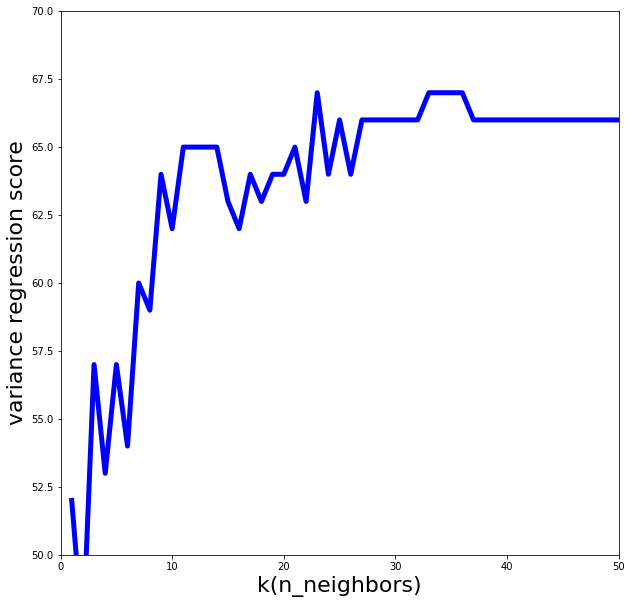

In [35]:
# Code for the plot
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Plot Isochrones

# Isochrone for 1 Gyr
# Plotting Color vs. Difference in Color 
plt.plot(a, b, color='blue', linewidth=5)

# Add axis labels
plt.xlabel('k(n_neighbors)', fontsize=22)
plt.ylabel('variance regression score', fontsize=22)

#set axis limits
plt.xlim(0,50)
plt.ylim(50,70)

# Best Parameter Setting 

n_neighbors:  84

p: 1 

score: 0.023230579644631266 (Best possible score is 1.0, lower values are worse.....can be negative)

In [28]:

cut = 650
train_x, train_y = x_data[0:cut], y_data[0:cut] # train = 650 datasets
#test_x, test_y = x_data[cut:650], y_data[cut:650] # test = 100 datasets

# Implementing KNN 
#kmodel = KNeighborsClassifier(n_neighbors=5)  
kmodel = KNeighborsRegressor(n_neighbors=84, weights='uniform', algorithm='auto', leaf_size=1, p=1 ,metric='minkowski', metric_params=None, n_jobs=None)
#kmodel = KNeighborsRegressor(n_neighbors=32, p=2)
# leaf size will only affect the speed, not the result
# n = 5,7,8 yields 78%

#kmodel.fit(x_data_train, y_data_train)
kmodel.fit(train_x, train_y)

md = kmodel.predict(test_x)


# 1. Male, 2. Age, 3. Debt, 4. Married, 5. Bank Customer, 6. Education Level, 7. Ethnicity, 8. Years Employed, 9.Prior Default, 10. Employed, 11. Credit Score, 12. Driver's License, 13. Citizen, 14. Zip Code, 15. Income 16. Approved

# Attribtes with Missing Datas:
# 1,2,4,5,6,7,14

In [ ]:
print(md)

# GridSearchCV

In [22]:
cut = 550
train_x, train_y = x_data[0:cut], y_data[0:cut] # train = 550 datasets
test_x, test_y = x_data[cut:650], y_data[cut:650] # test = 100 datasets

#X, y = x_data, y_data
X, y = train_x, train_y
X, y = np.asarray(X), np.asarray(y)


# build a classifier
#clf = MLPClassifier(learning_rate='constant', early_stopping=True, random_state=53450)
clf = KNeighborsClassifier(n_neighbors=32, weights='uniform', algorithm='auto', leaf_size=1, p=1, metric='minkowski', metric_params=None, n_jobs=None)
#clf = KNeighborsClassifier()

# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
params = {'n_neighbors': list(range(1,50)), 'p': [1,2,3,4,5]}
          
          #'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          #'leaf_size': list(range(1,100)),'metric': ['minkowski', 'manhattan'],'n_jobs': [-1,1]}
#'metric': ['minkowski', 'manhattan'], 

# 'p' is consistently equal to 1
# 'algorithm' does not affect the accuracy ; each algorithm is rank 1
# 'leaf size' does not affect the accuracy ; it only passed through certain algorithms ; all leaf size is rank 1
# 'metric' : minkowski & manhattan > chebyshev & euclidean (dont really know how to implement wminkowski, seuclidean, and mahalanobis)
# 'n_jobs': does not affect the accuracy ; each n_jobs is rank 1

# conclusion: n_neighebors = 32 ; p =1 ; every other parameters set to default settings ------> 79% percetage accuracy 


# run grid search
grid_search = GridSearchCV(clf, param_grid=params)
start = time()
grid_search.fit(X, y.ravel())

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)
#print(grid_search.cv_results_)


C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV took 11.52 seconds for 245 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.698 (std: 0.005)
Parameters: {'n_neighbors': 25, 'p': 3}

Model with rank: 2
Mean validation score: 0.696 (std: 0.007)
Parameters: {'n_neighbors': 18, 'p': 1}

Model with rank: 2
Mean validation score: 0.696 (std: 0.006)
Parameters: {'n_neighbors': 19, 'p': 3}

Model with rank: 4
Mean validation score: 0.695 (std: 0.005)
Parameters: {'n_neighbors': 19, 'p': 2}

Model with rank: 4
Mean validation score: 0.695 (std: 0.010)
Parameters: {'n_neighbors': 20, 'p': 3}

Model with rank: 4
Mean validation score: 0.695 (std: 0.004)
Parameters: {'n_neighbors': 25, 'p': 2}

Model with rank: 4
Mean validation score: 0.695 (std: 0.001)
Parameters: {'n_neighbors': 33, 'p': 3}

Model with rank: 4
Mean validation score: 0.695 (std: 0.001)
Parameters: {'n_neighbors': 33, 'p': 4}

Model with rank: 4
Mean validation score: 0.695 (std: 0.001)
Parameters: {'n_neighbors': 33, 'p': 5}

Model with r